# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | varash
City not found. Skipping...
Processing Record 3 of Set 1 | estacion coahuila
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | polyarnyy
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | pico truncado
Processing Record 9 of Set 1 | megion
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | arvika
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | nuuk
Pr

Processing Record 41 of Set 4 | tazacorte
Processing Record 42 of Set 4 | qui nhon
Processing Record 43 of Set 4 | amahai
Processing Record 44 of Set 4 | nova sintra
Processing Record 45 of Set 4 | dadonghai
City not found. Skipping...
Processing Record 46 of Set 4 | ndele
Processing Record 47 of Set 4 | yantzaza
Processing Record 48 of Set 4 | fale old settlement
Processing Record 49 of Set 4 | oriximina
Processing Record 0 of Set 5 | klyuchi
Processing Record 1 of Set 5 | micheweni
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | llanes
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | batang
Processing Record 6 of Set 5 | shizunai-furukawacho
Processing Record 7 of Set 5 | pangai
Processing Record 8 of Set 5 | boca do acre
Processing Record 9 of Set 5 | walvis bay
Processing Record 10 of Set 5 | susuman
Processing Record 11 of Set 5 | bikenibeu village
Processing Record 12 of Set 5 | turkmenbasy
Processing Record 13 of Set 5 | ta`u
Processi

Processing Record 30 of Set 8 | balabac
Processing Record 31 of Set 8 | kedrovyy
Processing Record 32 of Set 8 | malpica
Processing Record 33 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 34 of Set 8 | parambu
Processing Record 35 of Set 8 | terme
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | tocoa
Processing Record 38 of Set 8 | villa gesell
Processing Record 39 of Set 8 | shepparton
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | saint-philippe
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | kinkala
Processing Record 44 of Set 8 | cable beach
City not found. Skipping...
Processing Record 45 of Set 8 | kharkhorin
Processing Record 46 of Set 8 | funafuti
Processing Record 47 of Set 8 | acarau
Processing Record 48 of Set 8 | murzuq
Processing Record 49 of Set 8 | ruidoso
Processing Record 0 of Set 9 | kerikeri
Processing Record 1 of Set 9 | namdrik
Processing Record 2 of Set 9 | alamos

Processing Record 18 of Set 12 | malango
Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | jabor
Processing Record 21 of Set 12 | pontes e lacerda
Processing Record 22 of Set 12 | hinton
Processing Record 23 of Set 12 | inarajan village
Processing Record 24 of Set 12 | kiunga
Processing Record 25 of Set 12 | siwa oasis
Processing Record 26 of Set 12 | macapa
Processing Record 27 of Set 12 | yokadouma
Processing Record 28 of Set 12 | newman
Processing Record 29 of Set 12 | severo-yeniseyskiy
Processing Record 30 of Set 12 | nguigmi
Processing Record 31 of Set 12 | huicheng
Processing Record 32 of Set 12 | santa ana
Processing Record 33 of Set 12 | bodaybo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,14.51,73,100,1.36,CL,1701020065
1,estacion coahuila,32.1939,-115.0017,16.04,22,85,5.82,MX,1701020066
2,anadyr,64.7500,177.4833,1.28,100,100,13.00,RU,1701020067
3,invercargill,-46.4000,168.3500,10.57,92,100,0.45,NZ,1701020067
4,polyarnyy,69.1989,33.4478,-11.59,90,93,2.51,RU,1701020068


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Output/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,14.51,73,100,1.36,CL,1701020065
1,estacion coahuila,32.1939,-115.0017,16.04,22,85,5.82,MX,1701020066
2,anadyr,64.7500,177.4833,1.28,100,100,13.00,RU,1701020067
3,invercargill,-46.4000,168.3500,10.57,92,100,0.45,NZ,1701020067
4,polyarnyy,69.1989,33.4478,-11.59,90,93,2.51,RU,1701020068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Convert Date format
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"]).dt.strftime("%Y-%m-%d")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,14.51,73,100,1.36,CL,1970-01-01
1,estacion coahuila,32.1939,-115.0017,16.04,22,85,5.82,MX,1970-01-01
2,anadyr,64.7500,177.4833,1.28,100,100,13.00,RU,1970-01-01
3,invercargill,-46.4000,168.3500,10.57,92,100,0.45,NZ,1970-01-01
4,polyarnyy,69.1989,33.4478,-11.59,90,93,2.51,RU,1970-01-01


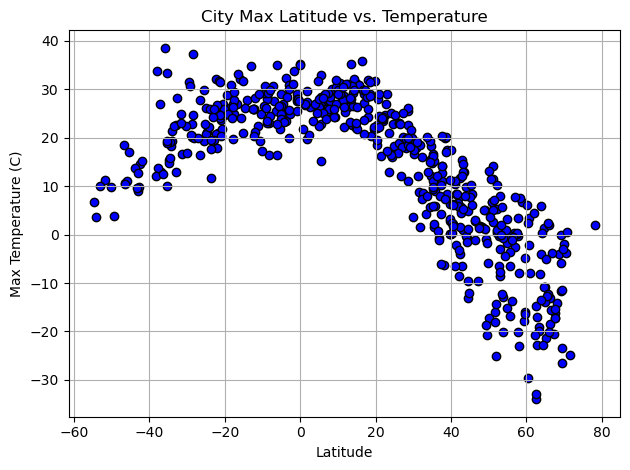

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (C)") 
plt.grid(True) 
plt.tight_layout() 

# Save the figure 
plt.savefig("../Output/output_data/Fig1.png") 

# Show plot 
plt.show()

#### Latitude Vs. Humidity

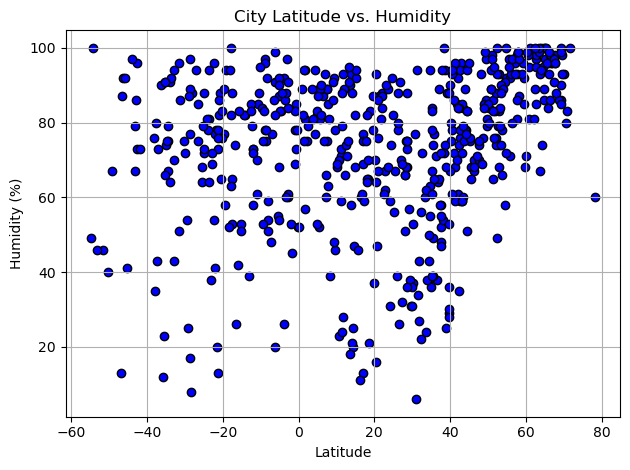

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity") 
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

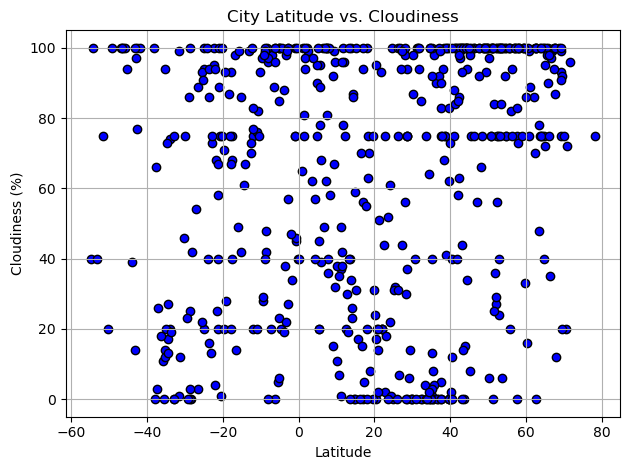

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness") 
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

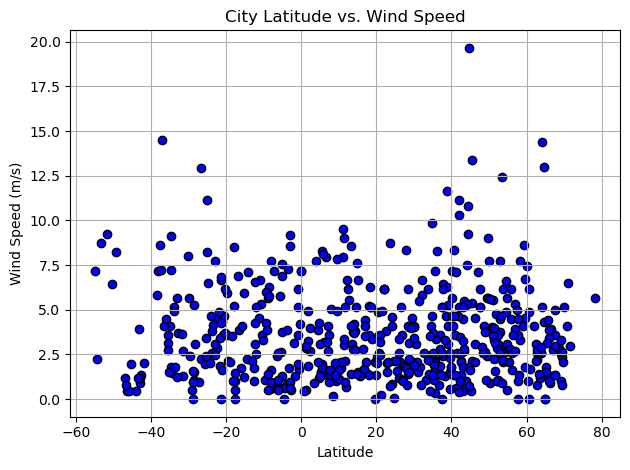

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed") 
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)") 
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../Output/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
    regress_values = x * slope + intercept 
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,estacion coahuila,32.1939,-115.0017,16.04,22,85,5.82,MX,1970-01-01
2,anadyr,64.7500,177.4833,1.28,100,100,13.00,RU,1970-01-01
4,polyarnyy,69.1989,33.4478,-11.59,90,93,2.51,RU,1970-01-01
7,megion,61.0296,76.1136,-7.99,100,89,1.67,RU,1970-01-01
12,arvika,59.6553,12.5852,-4.84,68,33,1.79,SE,1970-01-01


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,14.51,73,100,1.36,CL,1970-01-01
3,invercargill,-46.4000,168.3500,10.57,92,100,0.45,NZ,1970-01-01
5,port elizabeth,-33.9180,25.5701,21.29,91,20,5.14,ZA,1970-01-01
6,pico truncado,-46.7949,-67.9573,18.53,13,100,1.19,AR,1970-01-01
8,grytviken,-54.2811,-36.5092,3.70,100,100,2.24,GS,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8729735590499432


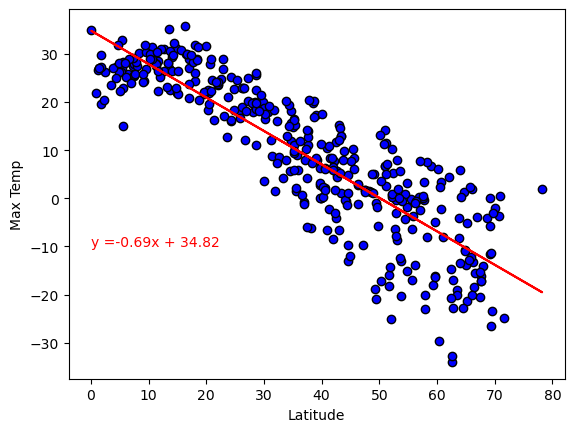

In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.annotate(line_eq, (0, -10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.6429997699135964


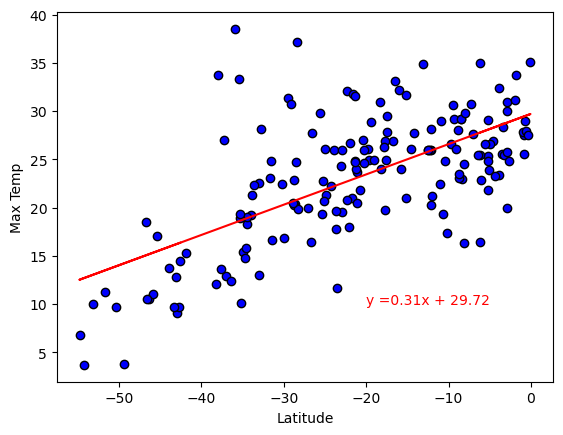

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.annotate(line_eq, (-20, 10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between Latitude and Max Temperature. In comparison, in the Southern Hemisphere, there is a moderately strong positive correlation between Latitude and Max Temperature. This implies that as one of them approaches the equator, temperatures tend to rise.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.35198269928468273


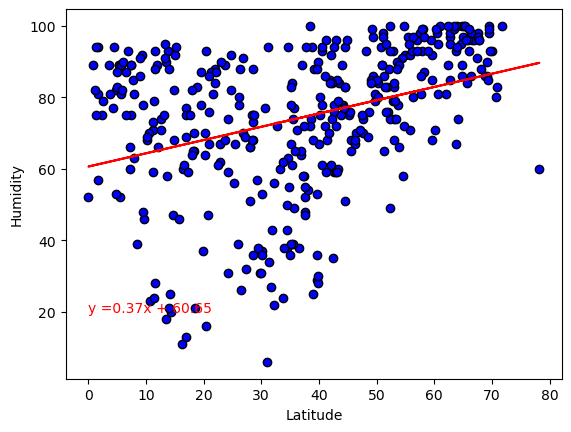

In [18]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(line_eq, (-0, 20), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.10035117070655124


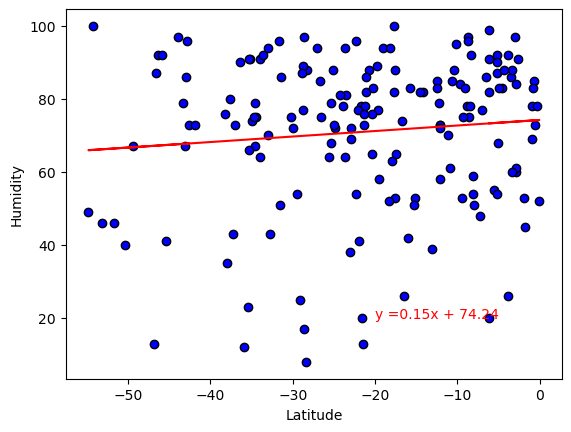

In [19]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(line_eq, (-20, 20), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between Latitude and Humidity. In comparison, in the Southern Hemisphere, there is little to none (very weak) positive correlation between Latitude and Humidity. Since both our correlations are weak, the results suggest that latitude alone is not a strong predictor of humidity, and other external factors could influence such weather patterns.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2594752982131088


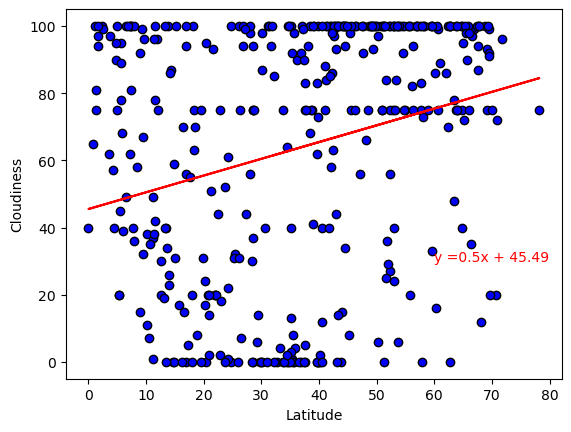

In [20]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(line_eq, (60, 30), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.11376308884735456


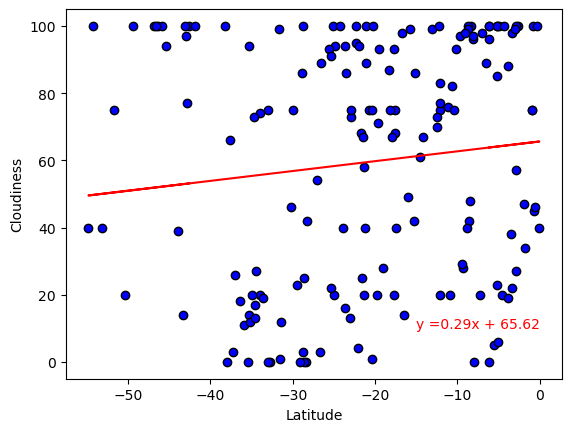

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(line_eq, (-15, 10), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive correlation between Latitude and Cloudiness. In comparison, in the Southern Hemisphere, there is little to none (very weak) positive correlation between Latitude and Cloudiness. Overall, both correlations are very weak, suggesting that latitude alone is not able to predict cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04359469014967643


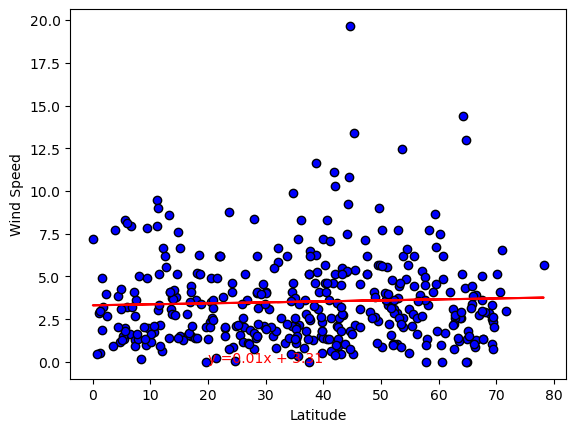

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(line_eq, (20, 0), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

The r-value is: -0.09664142318013685


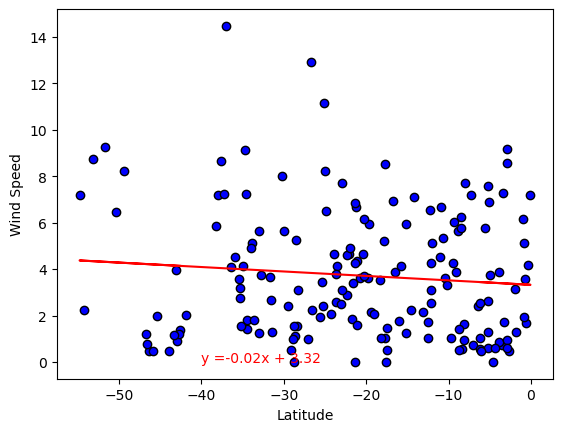

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 
regress_values = x * slope + intercept 
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x, y, facecolors="blue", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(line_eq, (-40, 0), fontsize=10, color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive correlation between Latitude and Wind Speed. In comparison, in the Southern Hemisphere, there is very weak negative correlation between Latitude and Wind Speed. Overall, both correlations are very weak, suggesting that latitude alone is not able to predict wind speed in either hemisphere. Other external factors, likely play more significant roles in determining wind speed patterns.